# Exercício - Kmeans - Dados Tabulares

Este caso requer o desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing. O conjunto de dados da amostra resume o comportamento de uso de cerca de 9.000 portadores de cartão de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis comportamentais.

## 1. Carregando os Dados

Importando a bibliteca necessária para carregar o banco de dados:

In [131]:
import pandas as pd
pd.set_option('display.max_columns', None)

Carregando e exibindo o banco de dados:

In [132]:
df = pd.read_csv(r'C:\Users\arnon\Documents\DNC\Exercícios\Clustering - Modelos Não Supervisionados I\CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Como a coluna "CUST_ID" não provê nenhuma informação, iremos retirar ela da base de dados:

In [133]:
df.drop(columns = 'CUST_ID', inplace = True)

Descrição das _features_ do dataset:

* __BALANCE__: saldo valor restante na conta do titular para fazer compras
* __BALANCE_FREQUENCY__: a frequência na qual BALANCE é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
* __PURCHASES__: quantidade de compras realizadas na conta
* __ONEOFF_PURCHASES__: valor máximo de compra feito de uma só vez
* __INSTALLMENTS_PURCHASES__: valor da compra parcelada
* __CASH_ADVANCE__: dinheiro adiantado dado pelo usuário
* __PURCHASES_FREQUENCY__: frequência na qual as compras estão sendo feitas, pontuação entre 0 e 1 (1 = comprado com frequência, 0 = comprado com pouca frequência)
* __ONEOFF_PURCHASES_FREQUENCY__: frequência na qual as compras acontecem de uma só vez (1 = compradas com frequência, 0 = compradas sem frequência)
* __PURCHASES_INSTALLMENTS_FREQUENCY__: frequência na qual as compras parceladas estão sendo feitas (1 = feitas com frequência, 0 = feitas com pouca frequência)
* __CASH_ADVANCE_FREQUENCY__: frequência na qual o dinheiro adiantado está sendo pago
* __CASH_ADVANCE_TRX__: número de transações feitas com "CASH_ADVANCE"
* __PURCHASES_TRX__: número de transações de compra realizadas
* __CREDIT_LIMIT__: limite de cartão de crédito para usuário
* __PAYMENTS__: valor do pagamento realizado pelo usuário
* __MINIMUM_PAYMENTS__: valor mínimo de pagamentos feitos pelo usuário
* __PRCFULLPAYMENT__: porcentagem do pagamento integral realizada pelo usuário
* __TENURE__: posse do serviço de cartão de crédito para o usuário

## 2. Análise Preliminar dos Dados

Tamanho do banco de dados:

In [134]:
df.shape

(8950, 17)

Percentual de nulos de cada coluna:

In [135]:
(df.isnull().sum()*100/len(df)).sort_values(ascending = False)

MINIMUM_PAYMENTS                    3.497207
CREDIT_LIMIT                        0.011173
BALANCE                             0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE_FREQUENCY                   0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_FREQUENCY                 0.000000
CASH_ADVANCE                        0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
TENURE                              0.000000
dtype: float64

Tipos de dados:

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Análise descritiva dos dados:

In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## 3. Análise Gráfica dos Dados

Como todas as variáveis do _dataset_ são numéricas, podemos plotar os gráficos sem realizar nenhuma separação prévia das colunas.

Importando as biblitecas necessárias para plotar a matriz de correlação:

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

Correlações:

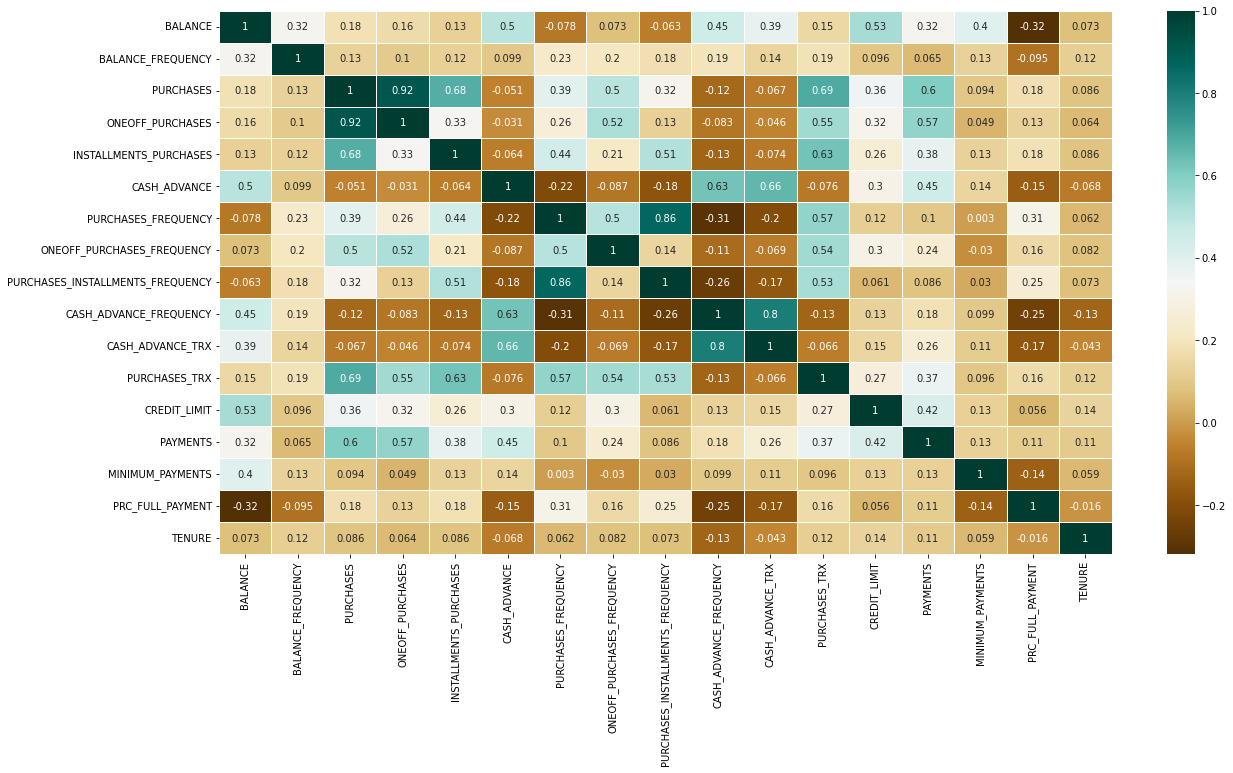

In [139]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, cmap = 'BrBG')
plt.show()

Gráficos de distribuição:

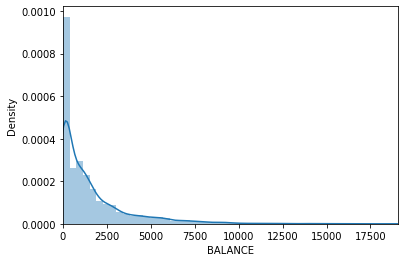

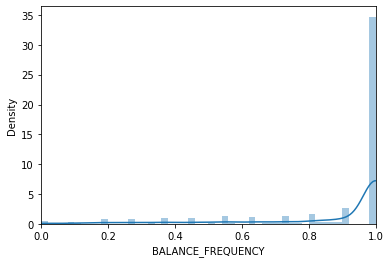

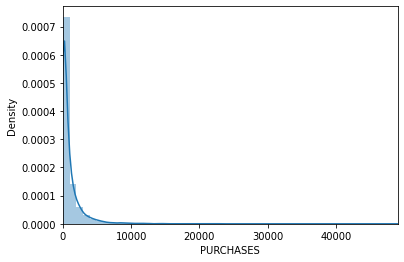

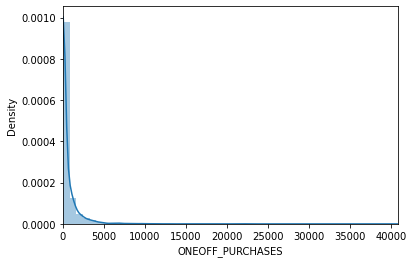

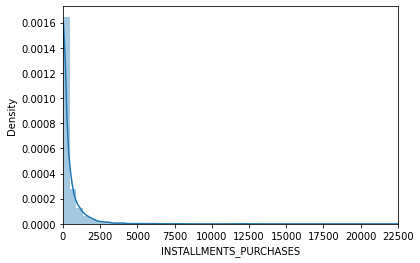

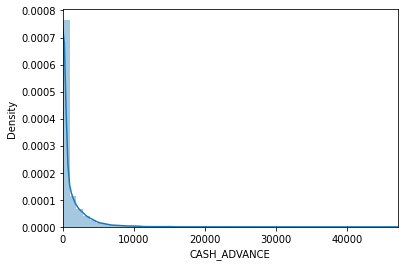

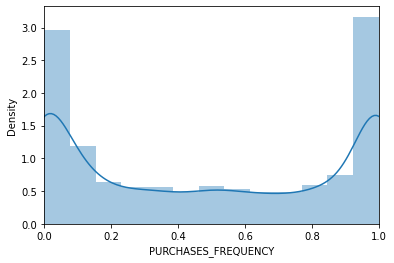

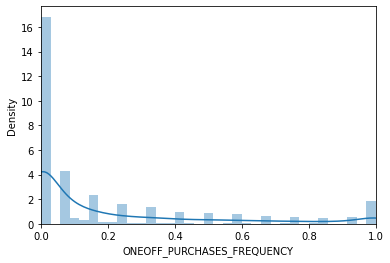

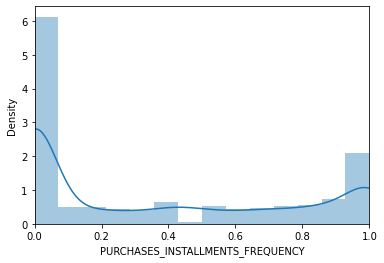

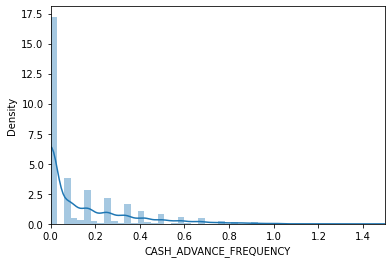

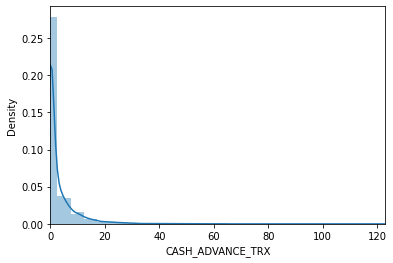

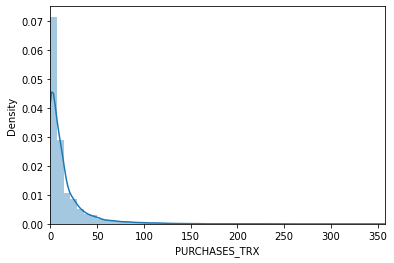

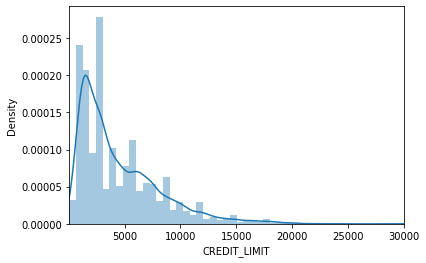

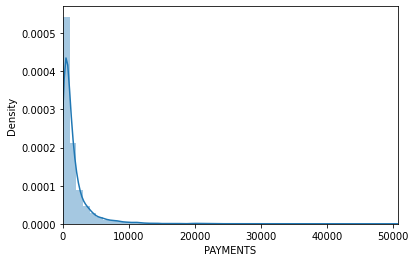

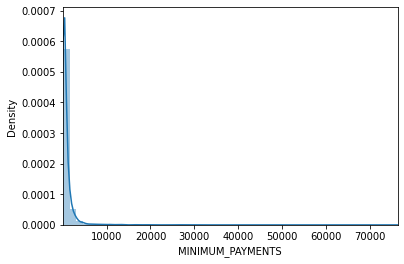

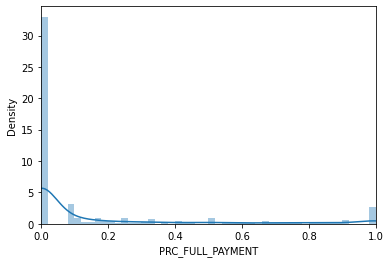

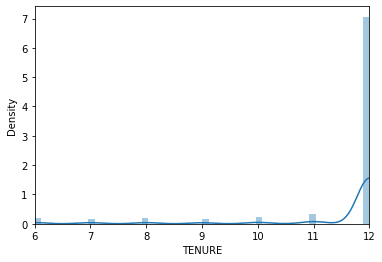

In [140]:
# Suprimindo os avisos sobre a função 'distplot'
import warnings
warnings.filterwarnings('ignore')

for i in df:
    fig, ax = plt.subplots()
    sns.distplot(df[i], ax = ax)
    ax.set_xlim(left = df[i].min(), right = df[i].max())
    plt.show()

Gráficos de _boxplot_:

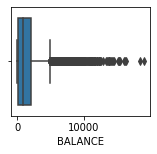

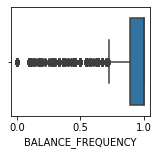

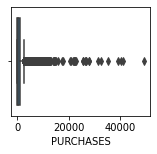

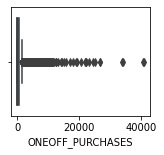

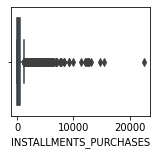

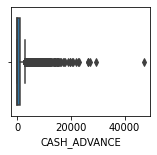

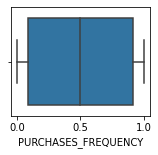

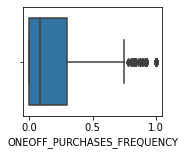

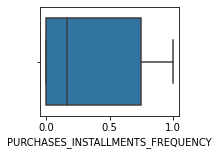

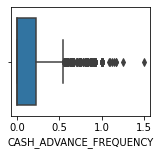

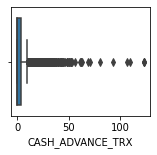

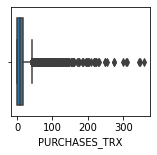

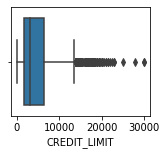

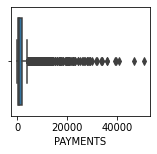

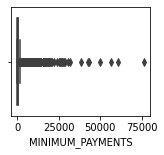

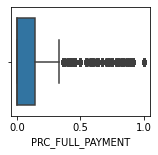

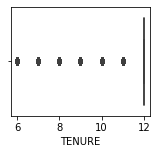

In [141]:
for i in df:
    plt.figure(figsize = (2.5,2))
    sns.boxplot(x = df[i])
    plt.show()

## 4. _Outliers_

Calculando os quartis:

In [142]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

Verificando a percentual de _outliers_ em cada coluna:

In [143]:
((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())*100/len(df)).sort_values(ascending = False)

BALANCE_FREQUENCY                   16.681564
PRC_FULL_PAYMENT                    16.469274
TENURE                              15.262570
CASH_ADVANCE                        11.508380
ONEOFF_PURCHASES                    11.318436
INSTALLMENTS_PURCHASES               9.687151
MINIMUM_PAYMENTS                     9.396648
PAYMENTS                             9.027933
PURCHASES                            9.027933
CASH_ADVANCE_TRX                     8.983240
ONEOFF_PURCHASES_FREQUENCY           8.737430
PURCHASES_TRX                        8.558659
BALANCE                              7.765363
CASH_ADVANCE_FREQUENCY               5.865922
CREDIT_LIMIT                         2.770950
PURCHASES_FREQUENCY                  0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
dtype: float64

Para esse exercício, selecionaremos somente até o percentil 95 de algumas colunas:

In [144]:
cols_95 = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS',
            'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX']

In [145]:
for i in cols_95:
    df = df[df[i] < df[i].quantile(0.95)]

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,5078.0,882.715885,1049.595230,0.000000,61.172240,499.594549,1338.131728,5901.592192
BALANCE_FREQUENCY,5078.0,0.864009,0.232770,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,5078.0,385.978090,436.480277,0.000000,15.500000,242.950000,585.292500,2452.690000
ONEOFF_PURCHASES,5078.0,195.738639,345.798225,0.000000,0.000000,0.000000,243.172500,1629.830000
INSTALLMENTS_PURCHASES,5078.0,190.527753,273.867064,0.000000,0.000000,51.385000,303.195000,1326.420000
CASH_ADVANCE,5078.0,424.649599,768.416778,0.000000,0.000000,0.000000,510.219541,4059.469587
PURCHASES_FREQUENCY,5078.0,0.427956,0.378983,0.000000,0.083333,0.333333,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,5078.0,0.125814,0.223118,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,5078.0,0.312819,0.369428,0.000000,0.000000,0.083333,0.666667,1.000000
CASH_ADVANCE_FREQUENCY,5078.0,0.091553,0.137161,0.000000,0.000000,0.000000,0.166667,1.166667


Deletando a lista das colunas selecionadas para o tratamento dos _outliers_:

In [147]:
del cols_95

## 5. Normalizando o _Dataset_

Importando as bibliotecas necessárias:

In [148]:
from sklearn.preprocessing import StandardScaler

Normalizando os dados:

In [149]:
df_normal = StandardScaler().fit_transform(df)

Criando um _dataframe_ com os dados normalizados e exibindo:

In [150]:
df_normal = pd.DataFrame(df_normal, index = df.index, columns = df.columns)
df_normal.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.802117,-0.196895,-0.665796,-0.566104,-0.347384,-0.552684,-0.689516,-0.563944,-0.621254,-0.667549,-0.640716,-0.703200,-0.972348,-0.874253,-0.657969,-0.529417,0.392579
2,1.536394,0.584288,0.887165,1.670015,-0.695763,-0.552684,1.509568,3.918425,-0.846849,-0.667549,-0.640716,0.669464,2.269370,-0.187969,0.764238,-0.529417,0.392579
4,-0.061936,0.584288,-0.847723,-0.519830,-0.695763,-0.552684,-0.909426,-0.190415,-0.846849,-0.667549,-0.640716,-0.840466,-0.872602,-0.096084,-0.351000,-0.529417,0.392579
7,0.896564,0.584288,0.115072,-0.566104,0.897138,-0.552684,1.509568,-0.563944,1.860307,-0.667549,-0.640716,0.669464,-0.324004,-0.094891,0.486515,-0.529417,0.392579
8,0.125976,0.584288,1.089531,1.347020,0.034590,-0.552684,-0.249701,-0.190415,-0.170060,-0.667549,-0.640716,-0.291401,2.020007,-0.079846,-0.155146,-0.529417,0.392579


## 6. Clusterizador

Importando a biblioteca KMeans:

In [151]:
from sklearn.cluster import KMeans

### 6.1. Método do Cotovelo

In [152]:
inertias = []
for k in range(1, 10):
    model = KMeans(n_clusters = k).fit(df_normal)
    inertias.append(model.inertia_)

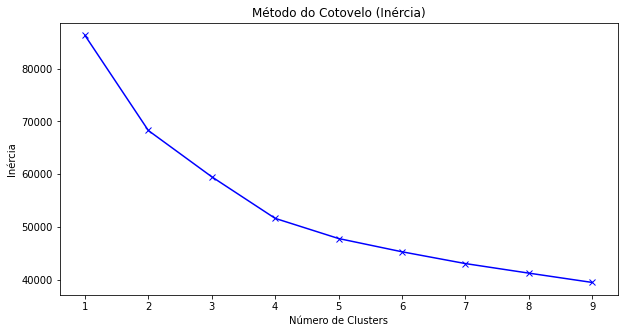

In [153]:
plt.figure(figsize = (10,5))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo (Inércia)')
plt.show()

Como no ponto 4 a curva começa a ficar menos acentuada, iremos utilizar esse número para a quantidade de clusters.

In [154]:
model = KMeans(n_clusters = 4, random_state = 42).fit(df_normal)

Estabelecendo os _clusters_:

In [155]:
cluster = model.predict(df_normal)

Atribuindo os _clusters_ às linhas do _dataset_:

In [156]:
df['cluster'] = cluster
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12,0
7,1823.652743,1.000000,436.20,0.00,436.2,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12,1
8,1014.926473,1.000000,861.49,661.49,200.0,0.0,0.333333,0.083333,0.250000,0.0,0,5,7000.0,688.278568,311.963409,0.0,12,2


### 6.3. _Boxplots_ dos _Clusters_:

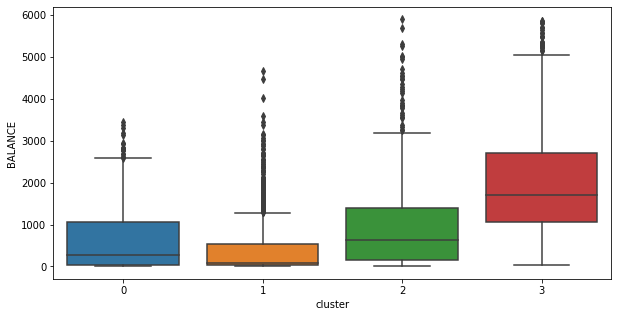

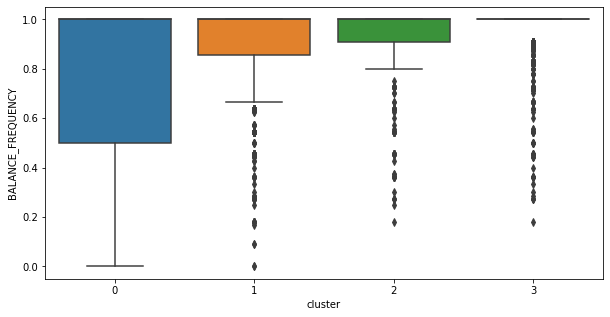

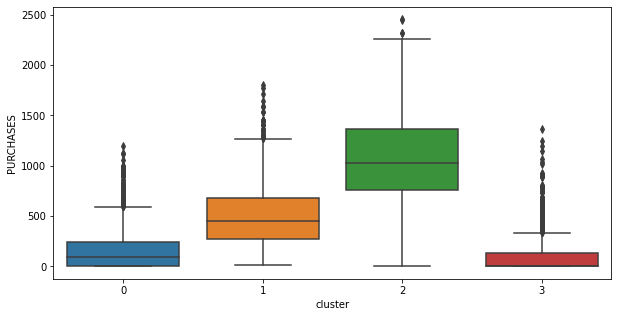

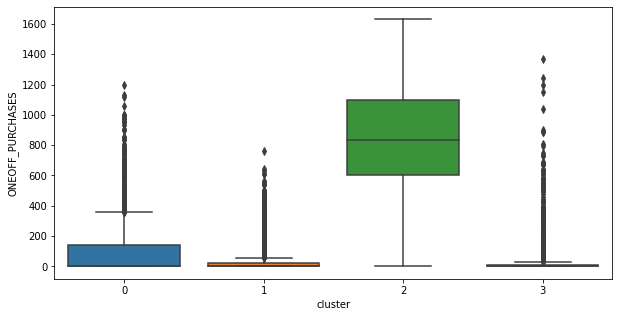

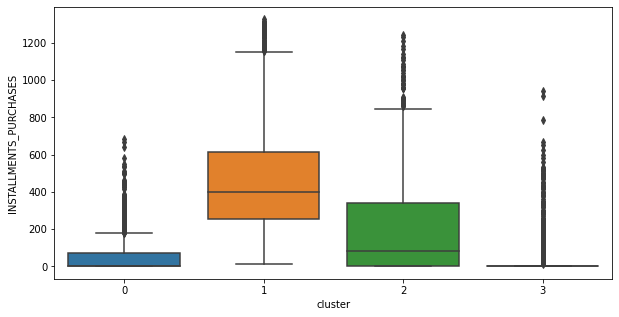

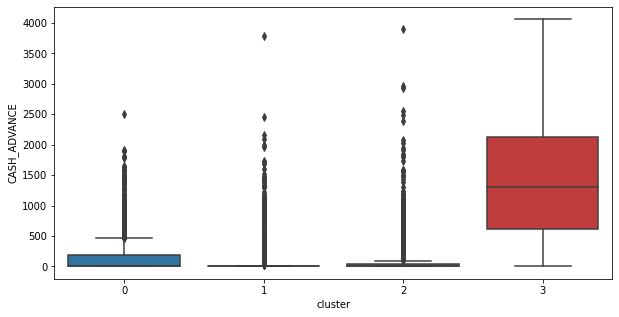

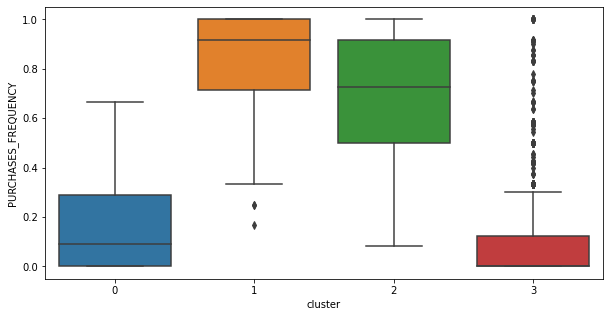

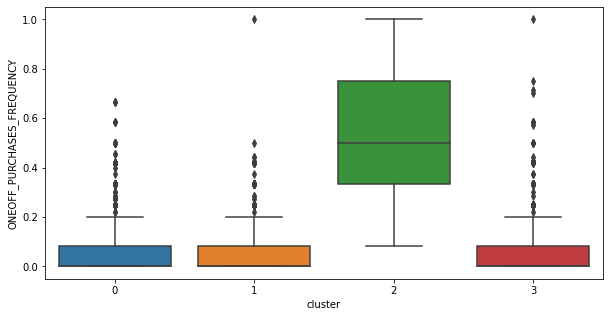

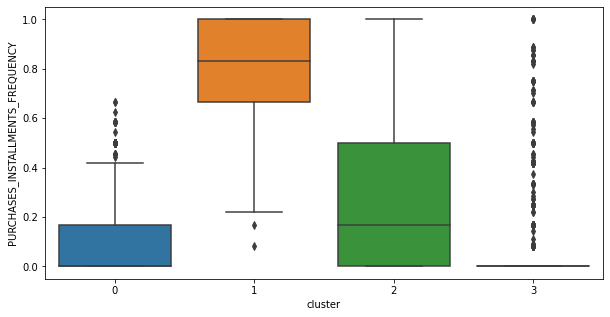

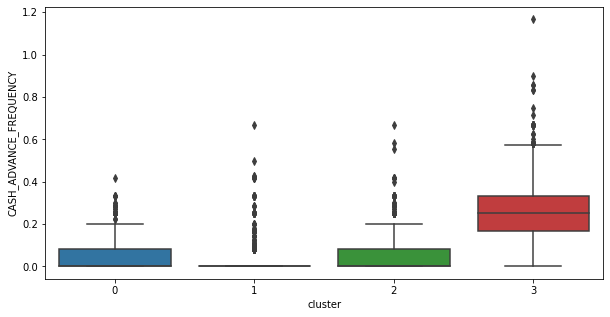

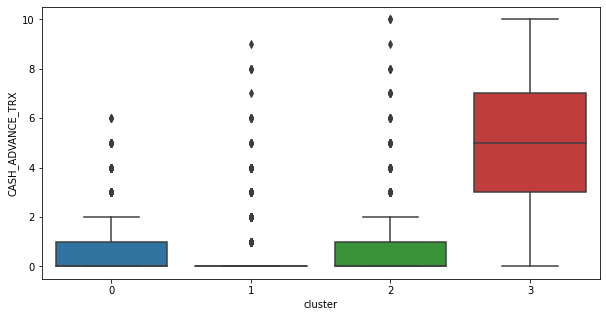

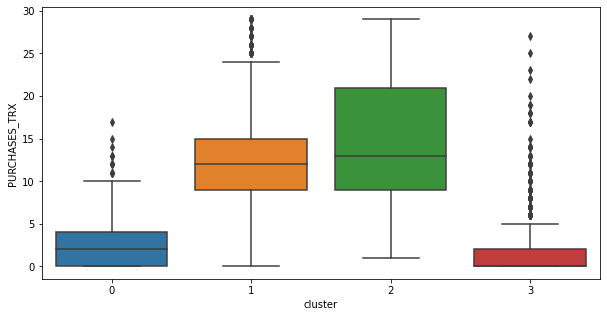

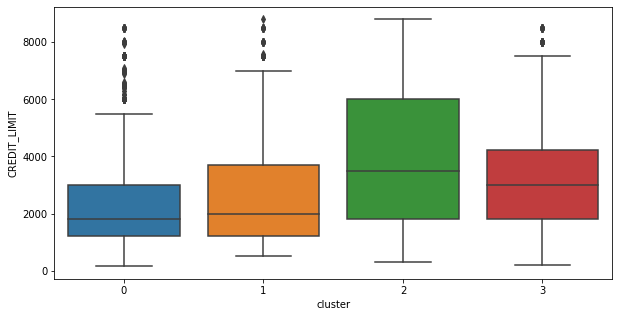

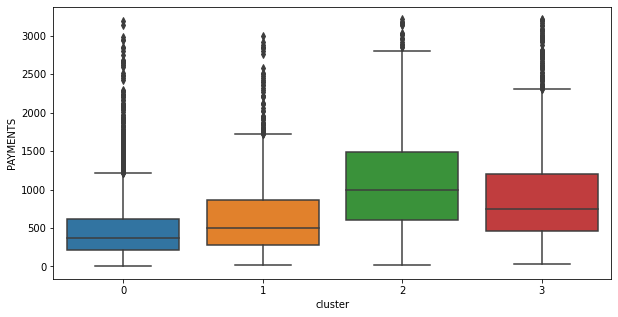

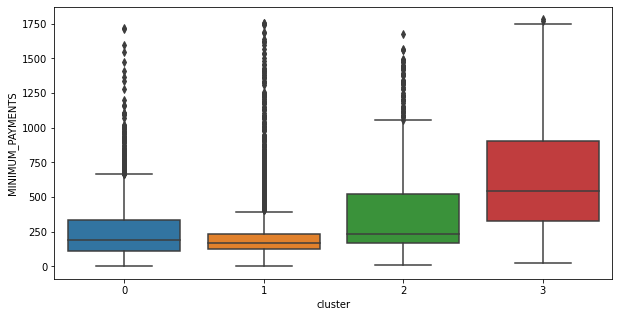

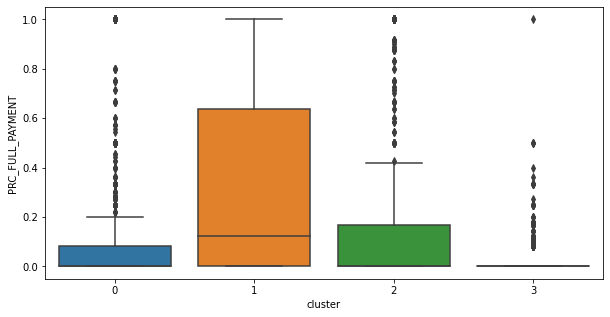

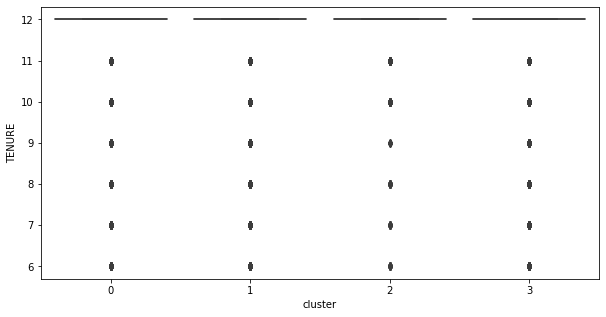

In [157]:
for i in df:
    if i != 'cluster':
        plt.figure(figsize = (10, 5))
        sns.boxplot(data = df, x = 'cluster', y = i)
        plt.show()

## 7. Conclusãoooo

Observando os resultados obtidos acima, entedemos que podemos dividir a amostra disponibilizada em 4 _clusters_.

O primeiro englobaria aqueles clientes de perfil mais contido, pois eles não compras muito em valor e nem em quantidade. Também não pagam adiantado.

O segundo delimitaria os clientes compradores, que adiquirem muito em valor e quantidade (apesar de não pagarem adiantado).

O terceiro perfil seria dos clientes em ascensão, ou seja, que estão começando a comprar mais (apesar da quantidade ainda ser normal e o pagamento não ser adiantado).

Por fim, o último cluster  seria dos clientes não devedores e que pagam sempre adiantado as suas compras.
